<a href="https://colab.research.google.com/github/vinkharisma/PCVK_Genap_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum Morfologi**

In [2]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Library**

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## **3. FUNGSI DILASI - Structuring Element Dilasi (SED) berbentuk cross 3 x 3**

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)

### Tanpa Menggunakan Library

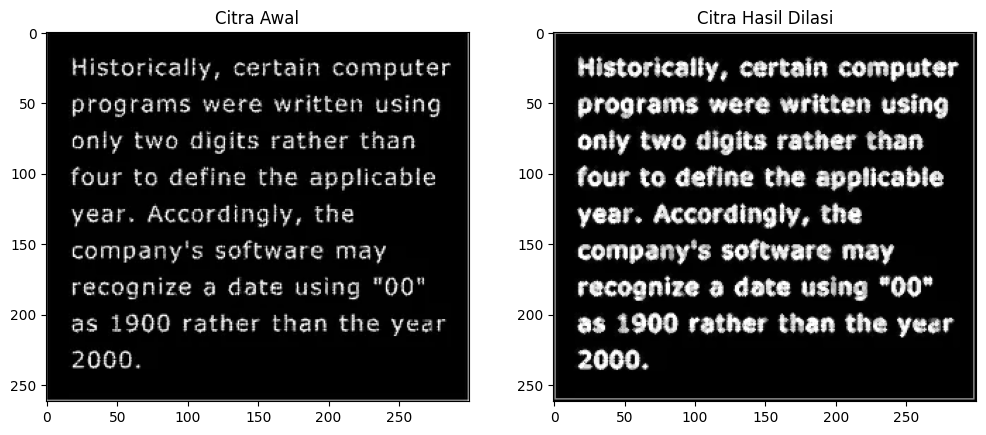

In [4]:
filename = '/content/drive/MyDrive/PCVK/Images/morphology.png'
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

def dilasi(img):
    
    # Inisialisasi kernel
    kernel = np.array([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]], dtype=np.uint8)

    img_dilation = np.zeros_like(img)

    # Ukuran citra dan kernel
    m, n = img.shape
    k, l = kernel.shape
    pad_h, pad_w = k//2, l//2

    # Melakukan operasi dilasi
    for i in range(pad_h, m-pad_h):
        for j in range(pad_w, n-pad_w):
            temp = img[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
            temp = temp * kernel
            img_dilation[i, j] = np.max(temp)

    return img_dilation

# Membaca citra
# 0 adalah menunjukkan bahwa citra akan dibaca dalam bentuk grayscale
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/morphology.png', 0)

# Melakukan dilasi
img_dilated = dilasi(img)

# Menampilkan citra asli dan citra hasil dilasi
plt.figure(figsize = (12,5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(1, 2, 2), plt.imshow(img_dilated, cmap='gray'), plt.title('Citra Hasil Dilasi')

plt.show()


## **4. OPERASI DILASI - Structuring Element Dilasi (SED) berbentuk cross 3 x 3**

Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

### Menggunakan Library

[[0 1 0]
 [1 1 1]
 [0 1 0]]


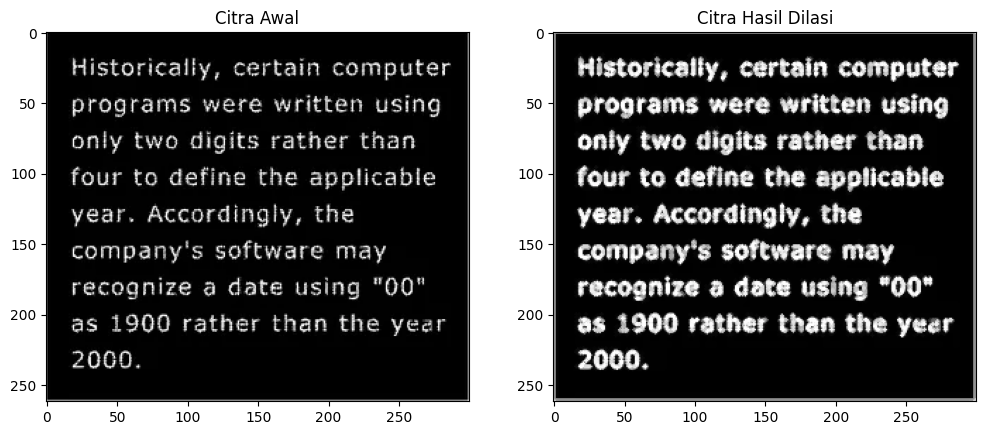

In [5]:
filename = '/content/drive/MyDrive/PCVK/Images/morphology.png'
img = cv2.imread(filename)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilation = cv2.dilate(img, kernel, iterations = 1)

print(kernel)

plt.figure(figsize = (12,5))
plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation, cmap="gray"), plt.title('Citra Hasil Dilasi')

plt.show()

## **5.	FUNGSI EROSI - Structuring Element Erosi (SE) berbentuk square 5 x 5**

Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

### Tanpa Menggunakan Library

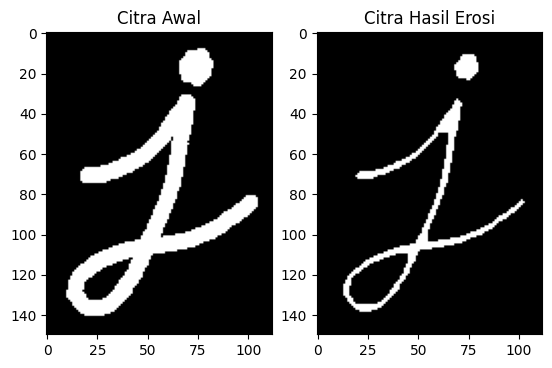

In [6]:
filename = '/content/drive/MyDrive/PCVK/Images/j.png'
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Inisialisasi ukuran kernel dan citra hasil erosi
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)
erosion = np.zeros_like(img)

# Konstanta padding
constant = (kernel_size - 1) // 2

# Operasi erosi
for i in range(constant, img.shape[0] - constant):
    for j in range(constant, img.shape[1] - constant):
        temp = img[i - constant:i + constant + 1, j - constant:j + constant + 1]
        product = temp * kernel
        erosion[i, j] = np.min(product)

# Menampilkan citra asli dan citra hasil erosi
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')

plt.show()


## **6.	OPERASI DILASI - Structuring Element Erosi (SE) berbentuk square 5 x 5**

Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png) 

### Menggunakan Library

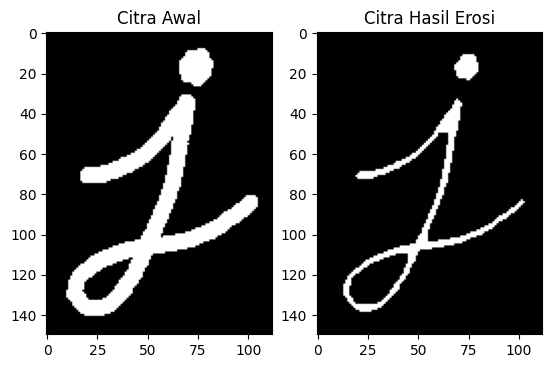

In [7]:
filename = '/content/drive/MyDrive/PCVK/Images/j.png'
img = cv2.imread(filename)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
erosion = cv2.erode(img, kernel,iterations = 1)

plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')

plt.show()

## **7.	OPERASI OPENING - Structuring Element berbentuk square 3 x 3**

Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png) 

### Tanpa Menggunakan Library

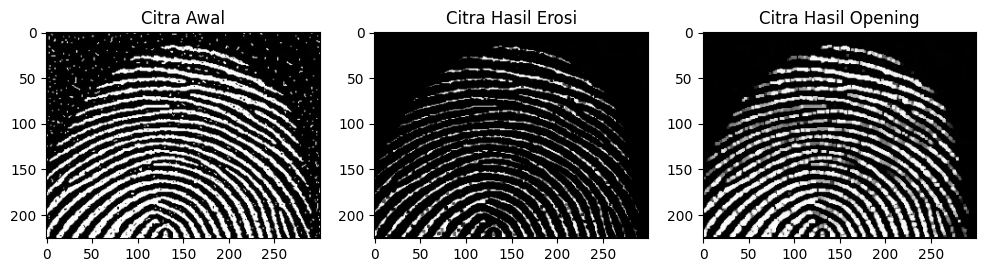

In [11]:
filename = '/content/drive/MyDrive/PCVK/Images/fingerprint.png'
img = cv2.imread(filename, 0)

m, n = img.shape

k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

erosion = np.zeros((m,n), dtype=np.uint8)

for i in range(constant, m-constant): 
  for j in range(constant,n-constant):
    temp = img[i-constant:i+constant+1, j-constant:j+constant+1] 
    product = temp * SE
    erosion[i,j] = np.min(product)

p, q= erosion.shape

opening = np.zeros((p,q), dtype=np.uint8)

SED = np.array([[1,1,1], 
                [1,1,1], 
                [1,1,1]])
constant1 = 1

for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = erosion[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    opening[i,j] =np.max(product)

plt.figure(figsize = (12,5))

plt.subplot(131), plt.imshow(img, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(opening, cmap="gray"), plt.title('Citra Hasil Opening')

plt.show()

### Menggunakan Library

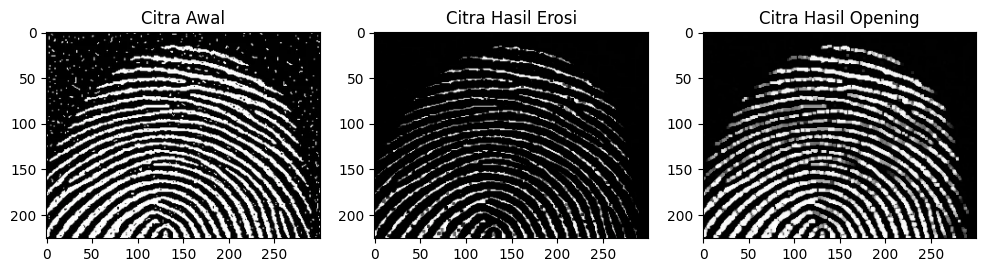

In [20]:
filename = '/content/drive/MyDrive/PCVK/Images/fingerprint.png'
img = cv2.imread(filename)

kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.figure(figsize = (12,5))

plt.subplot(131), plt.imshow(img, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(opening, cmap="gray"), plt.title('Citra Hasil Opening')

plt.show()

## **8.	OPERASI CLOSING - Structuring Element berbentuk square 3 x 3**

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

### Tanpa Menggunakan Library

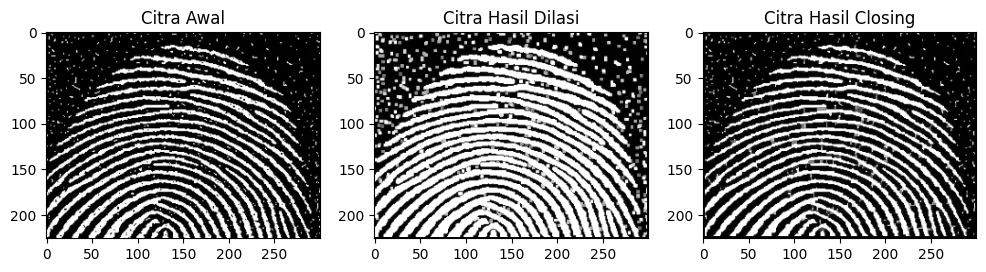

In [12]:
filename = '/content/drive/MyDrive/PCVK/Images/fingerprint.png'
img = cv2.imread(filename, 0)

p, q = img .shape

dilate = np.zeros((p,q), dtype=np.uint8)

SED = np.array([[1,1,1], 
                [1,1,1], 
                [1,1,1]])
constant1 = 1

for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img [i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    dilate[i,j] = np.max(product)

m, n = dilate.shape 

k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

closing = np.zeros((m,n), dtype=np.uint8)

for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp = dilate[i-constant:i+constant+1, j-constant:j+constant+1]
    product = temp * SE
    closing[i,j] = np.min(product)

plt.figure(figsize = (12,5))

plt.subplot(131), plt.imshow(img, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(dilate, cmap="gray"), plt.title('Citra Hasil Dilasi')
plt.subplot(133), plt.imshow(closing, cmap="gray"), plt.title('Citra Hasil Closing')

plt.show()

### Menggunakan Library

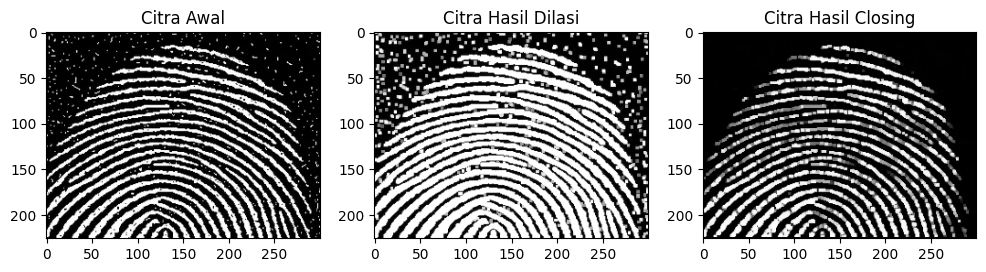

In [13]:
filename = '/content/drive/MyDrive/PCVK/Images/fingerprint.png'
img = cv2.imread(filename, 0)

kernel = np.ones((3,3),np.uint8)
erosion = cv2.dilate(img, kernel, iterations=1)
closing = cv2.morphologyEx(img , cv2.MORPH_CLOSE, kernel)

plt.figure(figsize = (12,5))

plt.subplot(131), plt.imshow(img , cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Dilasi')
plt.subplot(133), plt.imshow(opening, cmap="gray"), plt.title('Citra Hasil Closing')

plt.show()

## **9.	OPERASI DILASI - Structuring Element berbentuk Cross 3 x 3 dan 5 x 5**

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png) 

SED = Cross 3


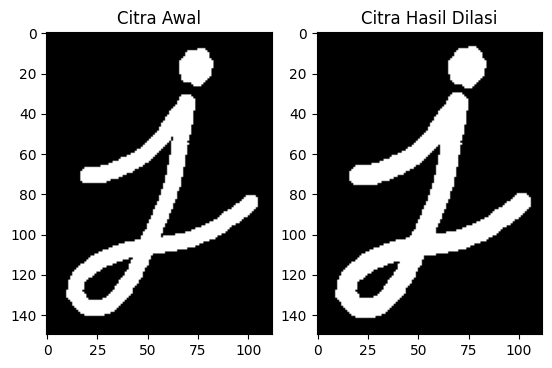

SED = Cross 5


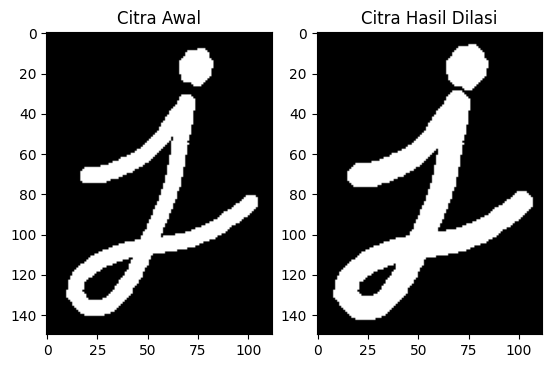

In [14]:
filename = '/content/drive/MyDrive/PCVK/Images/j.png'
img = cv2.imread(filename, 0)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
dilation_cross3 = cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel)

print("SED = Cross 3")
plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation_cross3, cmap="gray"), plt.title('Citra Hasil Dilasi')

plt.show()

kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
dilation_cross5 = cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel2)

print("SED = Cross 5")
plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation_cross5, cmap="gray"), plt.title('Citra Hasil Dilasi')

plt.show()

## **10.	OPERASI DILASI - Structuring Element berbentuk Circular 3 x 3 dan 5 x 5**

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png) 

SED = Circle 3


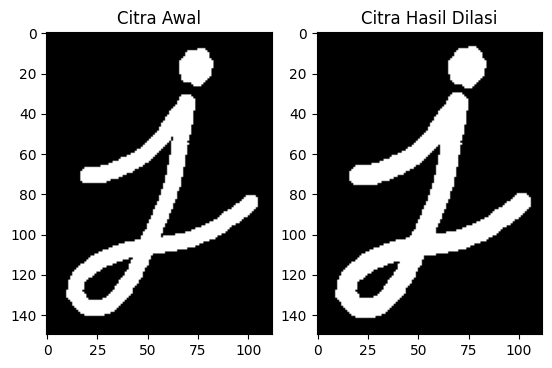

SED = Circle 5


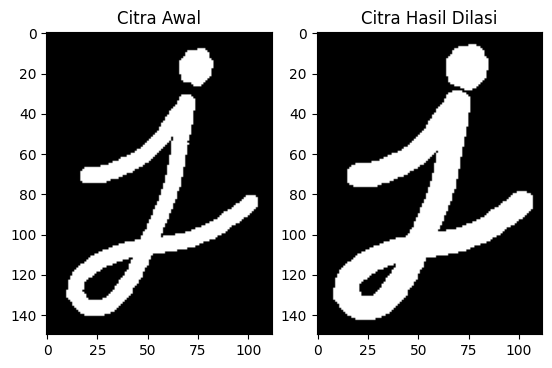

In [15]:
filename = '/content/drive/MyDrive/PCVK/Images/j.png'
img = cv2.imread(filename, 0)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
dilation = cv2.dilate(img,kernel,iterations = 1)
 
print("SED = Circle 3")
plt.subplot(121),plt.imshow(img, cmap="gray"),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation, cmap="gray"),plt.title('Citra Hasil Dilasi')

plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dilation = cv2.dilate(img,kernel,iterations = 1)

print("SED = Circle 5")
plt.subplot(121),plt.imshow(img, cmap="gray"),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation, cmap="gray"),plt.title('Citra Hasil Dilasi')

plt.show()

## **11. OPERASI EROSI - Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7**

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png) 

SE = Rectengle 3x5


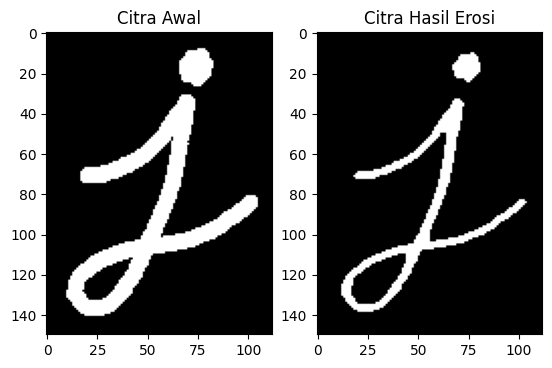

SE = Rectengle 5x7


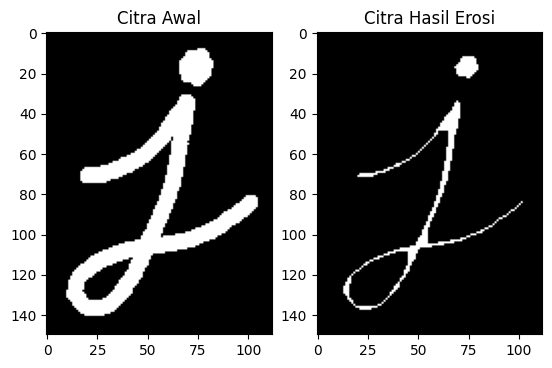

In [16]:
filename = '/content/drive/MyDrive/PCVK/Images/j.png'
img = cv2.imread(filename, 0)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,5))
erosion = cv2.erode(img,kernel,iterations = 1)

print("SE = Rectengle 3x5")
plt.subplot(121),plt.imshow(img, cmap="gray"),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(erosion, cmap="gray"),plt.title('Citra Hasil Erosi')

plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,7))
erosion = cv2.erode(img,kernel,iterations = 1)

print("SE = Rectengle 5x7")
plt.subplot(121),plt.imshow(img, cmap="gray"),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(erosion, cmap="gray"),plt.title('Citra Hasil Erosi')

plt.show()

## **12.	OPERASI EROSI - Structuring Element berbentuk Line Vertikal 3 dan 5**

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png) 

SE = Line Vertikal 3


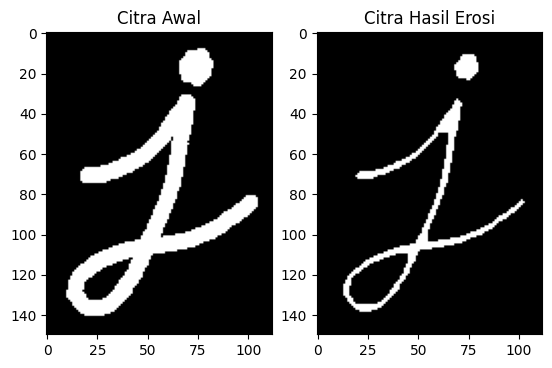

SE = Line Vertikal 5


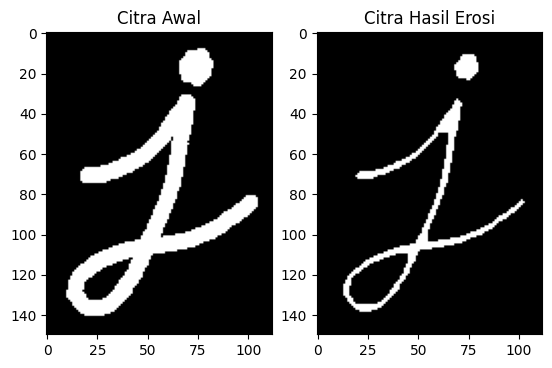

In [17]:
filename = '/content/drive/MyDrive/PCVK/Images/j.png'
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

m,n = img.shape 

k=3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

imgErode = np.zeros((m,n), dtype=np.uint8)

for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp = img[i-constant:i+constant+1, j-constant:j+constant+1]
    product = temp * SE
    imgErode[i,j]= np.min(product)
    m,n = img.shape 

k=5
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

imgErode = np.zeros((m,n), dtype=np.uint8)

for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp = img[i-constant:i+constant+1, j-constant:j+constant+1]
    product = temp * SE
    imgErode[i,j] = np.min(product)

print("SE = Line Vertikal 3")
plt.subplot(121), plt.imshow(img, cmap ="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(imgErode, cmap="gray"), plt.title('Citra Hasil Erosi')

plt.show()

print("SE = Line Vertikal 5")
plt.subplot(121), plt.imshow(img, cmap ="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(imgErode, cmap="gray"), plt.title('Citra Hasil Erosi')

plt.show()